In [249]:
using Symbolics
using LinearAlgebra
using Latexify
using Plots
using LaTeXStrings

In [250]:
include("inversion_ext.jl")

5×5 Matrix{Rational{Int64}}:
 1//1  0//1  0//1  0//1  0//1
 0//1  1//1  0//1  0//1  0//1
 0//1  0//1  3//4  0//1  1//4
 0//1  0//1  0//1  1//2  0//1
 0//1  0//1  1//4  0//1  3//4

$
    T_2^{ab} = \frac{\chi_2}{\mu^5}\left[48\xi^{cd}\xi_{cd} - \frac{960\ell^c\ell_c}{\mu} + \frac{2880\nu^2}{\mu^2}\right]\xi^a\xi^b
    + \frac{\chi_2}{\mu^4}\left[-6\xi^{cd}\xi_{cd} + \frac{96\ell^c\ell_c}{\mu} - \frac{240\nu^2}{\mu^2}\right] g^{ab} \\
    + \frac{384\chi_2\xi^{(a}\xi^{b)c}\ell_c}{\mu^5} - \frac{1920\chi_2\nu\xi^{(a}\ell^{b)}}{\mu^6}
    + \frac{192\chi_2\ell^a\ell^b}{\mu^5} + \frac{96\chi_2\nu\xi^{ab}}{\mu^5} - \frac{24\chi_2\xi^{ac}\xi^b{}_c}{\mu^4}
$

$\ell^a = \xi^{ac}\xi_{c}$

In [251]:
#=
T11_2 = χ2 *( (48 * ξab_cont - 960*ll/μ + 2880*ν^2/μ^2)*ξ_vec_u[2]^2/μ^5
        + 1.0/μ^4*(-6*ξab_cont + 96*ll/μ - 240*ν^2/μ^2)*1
        + 384*ξ_vec_u[2]*(ξ10*l_vec_d[1]+2*ξ11*l_vec_d[2])/μ^5
        -1920*ν*ξ_vec_u[2]*l_vec_u[2]/μ^6
        +192*l_vec_u[2]^2/μ^5
        +96*ν*ξ11/μ^5
        -24*ξ11^2/μ^4)
        =#
        


In [252]:
#=function Flux_imp_superexplicit!(Fl,flu,con,p)
    χ = p
    μ = flu[1]  # esto es -μ
    #μ = view(flu,1)
    g_small = [-1,1]
    T = (abs(μ))^(-1//2) # use μ positive, so I changed μ -> -μ
    #Cantidades relacionadas a la velocidad
    v = flu[2]

    γ = (1 - v^2)^(-1//2)
    v_vec_u = [γ, γ*v]
    v_vec_d = v_vec_u.*g_small
    ξ_vec_u = v_vec_u * sqrt(-μ)
    ξ_vec_d = v_vec_d * sqrt(-μ)
    #Otras variables disipativas  
    ν = flu[3]
    r1 = flu[4]
    r_vec_u = [v*r1, r1]
    r_vec_d = r_vec_u.*g_small
    rr = r1*(1-v^2)

    #Cantidades "Intermedias"
    l_vec_u = r_vec_u .- (ν/μ)*ξ_vec_u
    l_vec_d = l_vec_u .* g_small
    ll = rr - ν^2/ν

    t11 = flu[5]
    tt = t11^2*((v^2+1)^2+1//2*(v^2-1)^2)

    ξ00 = ν*T^2/3*(4γ^2 - 1) -2r1*v*γ*T + t11*v^2
    ξ01 = 4//3 * γ^2 * v * ν*T^2 - r1*γ*T *(1 + v^2) + t11*v # Indices arriba
    ξ10 = ξ01
    ξ11 = (4 * γ^2*v^2 + 1)/3 * ν*T^2 - 2.0*r1*v*γ*T + t11

    ξab_cont = ν^2/(12*μ^2) + rr + tt
    χ₀ = χ[1]
    χ₁ = χ[2]
    χ₂ = χ[3]
    
    #T11_0 = -8χ₀*T^4*(γ^2*v^2+1//4)  #Versión original
    T11_0 = -2*χ₀*(1 + 4*v^2*γ^2)/μ^2
    
    T11_1 = χ₁*(-80//3*T^8*ν*(γ^2*v^2+1//4)  - 20*T^7*r1*γ*v  - 2*T^6*t11)
#    T11_2 = χ₂*T^8*(ν^2*(-560*T^4*(γ^2*v^2 + 1//4)) - ν*r1*T^3*1120*γ*v - ν*t11*T^2*112
#                    + r1^2*T^2*(-315v^2-217)
#                    + r1*t11*T*336*γ*v*(v^2-1)
#                    + t11^2*(-111 - 78v^2 + 189v^4)/4)
    #T11_2 = χ₂*(T^12*ν^2*(-832//3 + 304//3*γ^2 - 32//3*γ^4 - 1296*γ^2*v^2 + 1634//3*γ^4*v^2 - 256//3*γ^6*v^2*(v^2-1)^2 - 544*γ^4*v^4) + T^11*r1*v*ν*γ*(-1120) + T^10*(r1^2*(-288+36*γ^2-648*γ^2*v^2+96*v^2*(1+γ^4*(1+v^4))+612*γ^2*v^4-192*γ^4*v^4) - 112*t11*ν) + T^9*(-336)*r1*t11*v*γ*(1-v^2) + T^8*t11^2*(-33 + v^2*(42-9*v^2) + γ^2*v^2*(-72*(1+v^4)+144*v^2)))
    T11_2 = χ₂ *( (48 * ξab_cont - 960*ll/μ + 2880*ν^2/μ^2)*ξ_vec_u[2]^2/μ^5
        + 1.0/μ^4*(-6*ξab_cont + 96*ll/μ - 240*ν^2/μ^2)*1
        + 384*ξ_vec_u[2]*(ξ10*l_vec_d[1]+2*ξ11*l_vec_d[2])/μ^5
        -1920*ν*ξ_vec_u[2]*l_vec_u[2]/μ^6
        +192*(r1-ν/μ*ξ_vec_u[2])^2/μ^5
        +96*ν*ξ11/μ^5
        -24*ξ11^2/μ^4)
    A111_1 = -3χ₁*γ*v*T^5*(2γ^2*v^2+1)
    A111_2 = - 12χ₂*T^8*(v*T*10*γ*(2γ^2*v^2+1)*ν + 3*(1+6γ^2*v^2)*flu[4] + 3v*γ*t11/T)

    Fl[1] = con[2] 
    Fl[2] = T11_0 + T11_1 + T11_2
    Fl[3] = con[4]
    Fl[4] = con[5] 
    Fl[5] = A111_1 + A111_2
    return -Fl[:]
end
=#

In [329]:
function Flux_imp!(Fl,flu,con,p)
    χ = p
    μ = flu[1]  # esto es -μ
    #μ = view(flu,1)
    T = (abs(μ))^(-1//2) # use μ positive, so I changed μ -> -μ
    v = flu[2]
    ν = flu[3]
    r1 = flu[4]
    t11 = flu[5]
    χ₀ = χ[1]
    χ₁ = χ[2]
    χ₂ = χ[3]
    γ = (1 - v^2)^(-1//2)
    
    #T11_0 = -8χ₀*T^4*(γ^2*v^2+1//4)  #Versión original
    T11_0 = -2*χ₀*(1 + 4*v^2*γ^2)/μ^2
    
    T11_1 = χ₁*(-80//3*T^8*ν*(γ^2*v^2+1//4)  - 20*T^7*r1*γ*v  - 2*T^6*t11)
#    T11_2 = χ₂*T^8*(ν^2*(-560*T^4*(γ^2*v^2 + 1//4)) - ν*r1*T^3*1120*γ*v - ν*t11*T^2*112
#                    + r1^2*T^2*(-315v^2-217)
#                    + r1*t11*T*336*γ*v*(v^2-1)
#                    + t11^2*(-111 - 78v^2 + 189v^4)/4)
    T11_2 = χ₂*(0.0
                #+T^12*ν^2*(-832//3 + 304//3*γ^2 - 32//3*γ^4 - 1296*γ^2*v^2 + 1634//3*γ^4*v^2 - 256//3*γ^6*v^2*(v^2-1)^2 - 544*γ^4*v^4) 
                #+ T^11*r1*v*ν*γ*(-1120) 
                #+ T^10*(r1^2*(-288+36*γ^2-648*γ^2*v^2+96*v^2*(1+γ^4*(1+v^4))
                #+612*γ^2*v^4-192*γ^4*v^4) - 112*t11*ν) 
                #+ T^9*(-336)*r1*t11*v*γ*(1-v^2) 
                #+ T^8*t11^2*(-33 + v^2*(42-9*v^2) + γ^2*v^2*(-72*(1+v^4)+144*v^2))
                )
                
    A111_1 = -3χ₁*γ*v*T^5*(2γ^2*v^2+1)
    A111_2 = - 12χ₂*T^8*(v*T*10*γ*(2γ^2*v^2+1)*ν + 3*(1+6γ^2*v^2)*flu[4] + 3v*γ*t11/T)

    Fl[1] = con[2] 
    Fl[2] = T11_0 + T11_1 + T11_2
    Fl[3] = con[4]
    Fl[4] = con[5] 
    Fl[5] = A111_1 + A111_2
    return -Fl[:]
end


function Flux_imp2!(Fl,flu,con,p)
    χ = p
    μ = flu[1]  # esto es -μ
    #μ = view(flu,1)
    #T = (abs(μ))^(-1//2) # use μ positive, so I changed μ -> -μ
    T = 1.0/sqrt(-μ)
    v = flu[2]
    ν = flu[3]
    r1 = flu[4]
    t11 = flu[5]
    χ₀ = χ[1]
    χ₁ = χ[2]
    χ₂ = χ[3]
    γ = (1 - v^2)^(-1//2)
    
    #T11_0 = -8χ₀*T^4*(γ^2*v^2+1//4)  #Versión original
    T11_0 = -2*χ₀*(1 + 4*v^2*γ^2)/μ^2
    
    T11_1 = χ₁*(-80//3*ν*(γ^2*v^2+1//4)/μ^4  - 20*r1*γ*v/(T*μ^4) + 2*t11/μ^3)
    T11_2 = χ₂*(T^12*ν^2*(-832//3 + 304//3*γ^2 - 32//3*γ^4 - 1296*γ^2*v^2 + 1634//3*γ^4*v^2 - 256//3*γ^6*v^2*(v^2-1)^2 - 544*γ^4*v^4) + T^11*r1*v*ν*γ*(-1120) + T^10*(r1^2*(-288+36*γ^2-648*γ^2*v^2+96*v^2*(1+γ^4*(1+v^4))+612*γ^2*v^4-192*γ^4*v^4) - 112*t11*ν) + T^9*(-336)*r1*t11*v*γ*(1-v^2) + T^8*t11^2*(-33 + v^2*(42-9*v^2) + γ^2*v^2*(-72*(1+v^4)+144*v^2)))
    A111_1 = χ₁/μ^3*(3*v*γ/T - 6*γ^3*v^3/T^3/μ)
    A111_2 = -12χ₂*T^8*(v*T*10*γ*(2γ^2*v^2+1)*ν + 3*(1+6γ^2*v^2)*r1 + 3v*γ*t11/T)

    Fl[1] = con[2] 
    Fl[2] = T11_0 + T11_1 + T11_2
    Fl[3] = con[4]
    Fl[4] = con[5] 
    Fl[5] = A111_1 + A111_2
    return -Fl[:]
end


Flux_imp2! (generic function with 1 method)

In [330]:
@variables f[1:5], c[1:5], Fl[1:5], p[1:3], r[1:5]

ff = Symbolics.scalarize(f)
cc = Symbolics.scalarize(c)
pp = Symbolics.scalarize(p)
rr = Symbolics.scalarize(r)

FFl = Symbolics.scalarize(Fl)

JFS_f = Symbolics.jacobian(Flux_imp!(FFl,ff,cc,pp),f);
JFS_c = Symbolics.jacobian(Flux_imp!(FFl,ff,cc,pp),c);
JF_f_exp = Symbolics.build_function(JFS_f, Fl, f, c, p);
JF_c_exp = Symbolics.build_function(JFS_c, Fl, f, c, p);
JFac_f = eval(JF_f_exp[1]);
JFac_c = eval(JF_c_exp[1]);


JFS2_f = Symbolics.jacobian(Flux_imp2!(FFl,ff,cc,pp),f);
JFS2_c = Symbolics.jacobian(Flux_imp2!(FFl,ff,cc,pp),c);
JF2_f_exp = Symbolics.build_function(JFS2_f, Fl, f, c, p);
JF2_c_exp = Symbolics.build_function(JFS2_c, Fl, f, c, p);
JFac2_f = eval(JF2_f_exp[1]);
JFac2_c = eval(JF2_c_exp[1]);
#JF_f_exp[2]

#237 (generic function with 1 method)

In [331]:
re = zeros(5)
fl = zeros(5)
flu=2.0*[-1.;0.;0.0;0.0;0.0];
par_f = [1,0.1,0.01]
con = f2c!(re,flu,zeros(5), par_f);
JFac_f(fl,flu,con,par_f)
JFac_c(fl,flu,con,par_f)
Jf2c(r,flu,con,par_f) # Notar que para v \to 1 la matríz se hace singular.
A0 = Jf2c(r,flu,con,par_f)*inv(Jf2a_exp1(flu))*S
#[Jf2c(r,flu,con,par_f) inv(Jf2a_exp1(flu))]
#inv(Jf2a_exp1(flu))
#A0'- A0

5×5 Matrix{Float64}:
 -4.24264   0.0      -0.1875      0.0        -0.0625
  0.0      -1.41421   0.0        -0.0625      0.0
 -0.1875    0.0      -0.0795495   0.0        -0.0265165
  0.0      -0.0625    0.0        -0.0265165   0.0
 -0.0625    0.0      -0.0265165   0.0        -0.0159099

In [332]:
eigvals(A0)
PC(r,fl,flu,c,p) =  JFac_f(fl,flu,c,p)*inv(Jf2c(r,flu,c,p)) + JFac_c(fl,flu,c,p) #var conserv
PC2(r,fl,flu,c,p) =  JFac2_f(fl,flu,c,p)*inv(Jf2c(r,flu,c,p)) + JFac2_c(fl,flu,c,p) #var conserv
PF(r,fl,flu,c,p) = inv(Jf2c(r,flu,c,p))*(JFac_f(fl,flu,c,p) + JFac_c(fl,flu,c,p)*Jf2c(r,flu,c,p)) #var fluid

PF (generic function with 1 method)

In [333]:
A1=(JFac_f(fl,flu,con,par_f) + JFac_c(fl,flu,con,par_f)*Jf2c(r,flu,con,par_f))*inv(Jf2a_exp1(flu))*S

5×5 Matrix{Float64}:
 0.0      1.41421  0.0        0.0625     0.0
 1.41421  0.0      0.0625     0.0        0.0375
 0.0      0.0625   0.0        0.0265165  0.0
 0.0625   0.0      0.0265165  0.0        0.0159099
 0.0      0.0375   0.0        0.0159099  0.0

In [335]:
#The propagations speeds should be +-1/sqrt(3), +-sqrt(3/5) and zero

re = zeros(5)
fl = zeros(5)
flu=[-1.;0.0;0.0;0.0;0.0];
flu[2] = 0.0
par_f = [-1.,1.0,-1.]
con = f2c!(re,flu,zeros(5), par_f);
eigvals(PC(re,fl,flu,con,par_f))
fulleigenvals = eigvals(PC(re,fl,flu,con,par_f))
println("Eigenvalues = ")
for i in 1:5
    println(fulleigenvals[i])
end
println("flu = ", flu)
println("sqrt(1/3) = $(sqrt(1/3))")
println("sqrt(3/5) = $(sqrt(3/5))")


Eigenvalues = 
-0.7745966692414833
-0.5773502691896256
0.0
0.5773502691896258
0.7745966692414834
flu = [-1.0, 0.0, 0.0, 0.0, 0.0]
sqrt(1/3) = 0.5773502691896257
sqrt(3/5) = 0.7745966692414834


In [336]:
"""
### flu_from_xi!
This function takes a 5 element vector flu = [μ, v, ν, r1, τ11] and a 3 element vector ξab_uu,
and changes ν, r1 and τ11 so that they are consistent with μ, v and ξab_uu. The function modifies
flu and also returns flu.
"""
function flu_from_xi!(flu, ξab_uu)
    v = flu[2]
    μ = flu[1]

    γ2 = 1.0/(1-v^2)
    γ = sqrt(γ2)
    g00 = -1.0
    g11 = 1.0
    va_d = [-γ, γ*v]
    ξa_d = va_d*sqrt(-μ)
    ξ0_d = ξa_d[1]
    ξ1_d = ξa_d[2]
    ξ00_uu = ξab_uu[1]
    ξ01_uu = ξab_uu[2]
    ξ10_uu = ξ01_uu
    ξ11_uu = ξab_uu[3]

    ξ11_dd = ξ11_uu
    ν = ξ00_uu*ξ0_d*ξ0_d + (ξ01_uu+ξ10_uu)*ξ0_d*ξ1_d + ξ11_uu*ξ1_d*ξ1_d
    r1_d = ξ10_uu*ξ0_d + ξ11_uu*ξ1_d - ν/μ * ξ1_d
    τ11_dd = ξ11_dd - (4//3) * ν/μ^2 * (ξ1_d*ξ1_d - μ/4*g11) - 2/μ * ξ1_d*r1_d

    flu[3] = ν
    flu[4] = r1_d
    flu[5] = τ11_dd
    return flu
end
"""
### xi_from_flu!
This function takes a 5 element vector flu = [μ, v=0.0, ν, r1, τ11] and a 3 element vector ξab_uu = [ξ00, ξ01, ξ11],
and changes ξab so that they are consistent with flu. The function modifies
ξab and also returns ξab. Notice that v MUST be zero for this function to work in its current implementation.
"""
function xi_from_flu!(ξab_uu, flu)
    v = flu[2]
    μ = flu[1]
    γ2 = 1/(1-v^2)
    γ = sqrt(γ2)
    T = 1/sqrt(-μ)
    ξ0_d = -γ*sqrt(-μ)
    ξ1_d = γ*sqrt(-μ)*v
    ν = flu[3]
    r1_d = flu[4]
    τ11_dd = flu[5]
    #=
    #Formulas if v = 0
    ξ00_uu = -ν/μ
    ξ01_uu = r1_d/ξ0_d
    ξ10_uu = ξ01_uu
    ξ11_dd = τ11_dd - (4//3) * ν/μ
    ξ11_uu = ξ11_dd
    =#
    ξ00_uu = ν*T^2/3*(4γ^2 - 1) -2r1_d*v*γ*T + τ11_dd*v^2
    ξ01_uu = 4//3 * γ^2 * v * ν*T^2 - r1_d*γ*T *(1 + v^2) + τ11_dd*v # Indices arriba
    ξ11_uu = (4 * γ^2*v^2 + 1)/3 * ν*T^2 - 2.0*r1_d*v*γ*T + τ11_dd
    
    ξab_uu[1] = ξ00_uu
    ξab_uu[2] = ξ01_uu
    ξab_uu[3] = ξ11_uu
    return ξab_uu
end

xi_from_flu!

In [337]:
function random_sign(N)
    return sign.(0.5.-rand(N))
end
flu = rand(5) .* [-1, random_sign(4)...]  #We create a random flux vector
ξab_uu = [0.0, 0.0, 0.0]

xi_from_flu!(ξab_uu, flu)
println(flu)
println(ξab_uu)

[-0.8466386455325049, -0.8481057322024735, -0.019949332481959292, -0.4761372571871535, 0.8514799483172386]
[-1.1482518938705806, 1.0519504577276169, -0.8935186250535851]


In [338]:
#Checking that the inversion is working properly
#The flu vector should return to being the same as in the previous cell
flu[3] = 0.0
flu[4] = 0.0
flu[5] = 0.0
flu_from_xi!(flu, ξab_uu)
println(flu)
println(ξab_uu)

[-0.8466386455325049, -0.8481057322024735, -0.019949332481962623, -0.47613725718714683, 0.8514799483172301]
[-1.1482518938705806, 1.0519504577276169, -0.8935186250535851]


In [339]:
re = zeros(5)
fl = zeros(5)
flu=[-1.;0.0;0.0;0.0;0.0];
ξ = [0.0, 0.0, 0.00]
xi_from_flu!(ξ, flu)
flu[2] = 0.0
flu_from_xi!(flu, ξ)
par_f = [-1.,1.0,-1.0]
con = f2c!(zeros(5),flu,zeros(5), par_f);
fulleigenvals = eigvals(PC(re,fl,flu,con,par_f))
println("Eigenvalues = ")
for i in 1:5
    println(fulleigenvals[i])
end
println("flu = ", flu)

#Cambiamos la velocidad a 0.1, y verificamos si el modo 0 ahora se mueve a esa velocidad
flu[2] = 0.0
flu_from_xi!(flu, ξ)
par_f = [-1.,1.0,-1.0]
con = f2c!(zeros(5),flu,zeros(5), par_f);
fulleigenvals = eigvals(PC(re,fl,flu,con,par_f))

println("==================================================")
println()
fulleigenvals2 = eigvals(PC2(re,fl,flu,con,par_f))
println("Eigenvalues = ")
for i in 1:5
    println(fulleigenvals[i])
end
println("flu = ", flu)

Eigenvalues = 
-0.7745966692414833
-0.5773502691896256
0.0
0.5773502691896258
0.7745966692414834
flu = [-1.0, 0.0, 0.0, 0.0, 0.0]

Eigenvalues = 


-0.7745966692414833
-0.5773502691896256
0.0
0.5773502691896258
0.7745966692414834
flu = [-1.0, 0.0, 0.0, 0.0, 0.0]


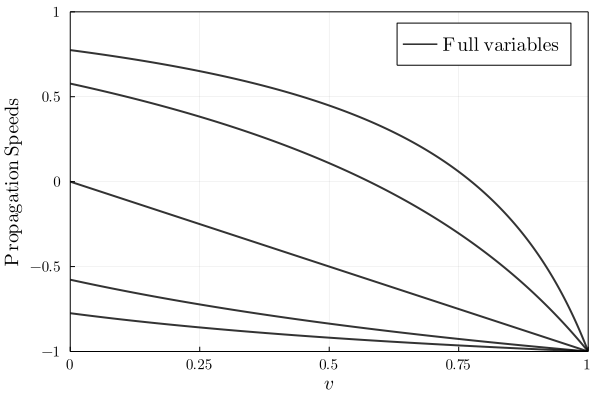

In [340]:
re = zeros(5)
fl = zeros(5)
N = 1000
flu=[-1.0;0.0;0.0;0.0;0.0];
ξ = [0.0, 0.0, 0.0]
xi_from_flu!(ξ, flu)
par_f = [-1.0,1.0,-1.0]

fullEig = fill(0.0+0.0im,(5,N))
fullEig2 = fill(0.0+0.0im,(5,N))
v = zeros(N)

for i in 1:N
    v[i] = (i-1)/(N-1)/1.001
    flu[2] = v[i]
    flu_from_xi!(flu, ξ)
    re = zeros(5)
    fl = zeros(5)
    con = f2c!(zeros(5),flu,zeros(5), par_f);
    fullEig[:,i] = eigvals(PC(re,fl,flu,con,par_f))
    fullEig2[:,i] = eigvals(PC2(re,fl,flu,con,par_f))
end
re = zeros(5)
fl = zeros(5)

one(x)=1
plt = plot(framestyle = :box, xlabel = L"v", ylabel = L"\textrm{Propagation\;Speeds}", labelfontsize = 13, 
            legendfontsize = 13, tickfontsize=10, ticksize = 10)
γ = (1 .- v.^2).^(-1//2)

for k in 1:5
    plot!(plt, v,real(fullEig[k,:]), lw = 2, color = :black, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables}" : ""))
    #plot!(plt, v,real(fullEig2[k,:]), lw = 2, color = :red, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables\;2}" : ""))
end
ylims!(-1,1)
xlims!(0,1)
yticks!([-1,0,1, -0.5, 0.5], [L"-1", L"0", L"1", L"-0.5", L"0.5"])
xticks!([0, 0.25, 0.5, 0.75, 1], [L"0", L"0.25", L"0.5", L"0.75", L"1"])
display(plt)

## Experimento

Hagamos el análisis de autovalores usando $\xi^{a}$ y $\xi^{ab}$ como variables.

$$
    T_0^{ab} = \frac{-2\chi_0}{\mu^3}\left(\mu g^{ab} - 4\xi^a \xi^b\right),
$$

$$
    T_1^{ab} =\chi_{1}\left[\frac{48\nu}{\mu^{5}}\xi^{a}\xi^{b}-\frac{24}{\mu^4}\xi^{(a}\ell^{b)}-\dfrac{6\nu}{\mu^{4}}g^{ab}+\dfrac{2}{\mu^{3}}\xi^{ab}\right]
$$

$$
    T_2^{ab} = \frac{\chi_2}{\mu^5}\left[48\xi^{cd}\xi_{cd} - \frac{960\ell^c\ell_c}{\mu} + \frac{2880\nu^2}{\mu^2}\right]\xi^a\xi^b
    + \frac{\chi_2}{\mu^4}\left[-6\xi^{cd}\xi_{cd} + \frac{96\ell^c\ell_c}{\mu} - \frac{240\nu^2}{\mu^2}\right] g^{ab} \\
    + \frac{384\chi_2\xi^{(a}\xi^{b)c}\ell_c}{\mu^5} - \frac{1920\chi_2\nu\xi^{(a}\ell^{b)}}{\mu^6}
    + \frac{192\chi_2\ell^a\ell^b}{\mu^5} + \frac{96\chi_2\nu\xi^{ab}}{\mu^5} - \frac{24\chi_2\xi^{ac}\xi^b{}_c}{\mu^4}
$$

con $\ell^a = \xi^{ac}\xi_{c}$, $\nu = \ell^{a}\xi_{a}$.

$$
A_1^{abc}=\dfrac{\chi_1}{\mu^3}\left[g^{ab}\xi^{c}+g^{ac}\xi^{b}+g^{bc}\xi^{a}-\dfrac{6}{\mu}\xi^{a}\xi^{b}\xi^{c}\right]
$$

$$
A_2^{abc} =\dfrac{\chi_{2}}{\mu^3}
    \left[ \xi^{a}
        \left(\dfrac{-12}{\mu}\xi^{bc}+\dfrac{192}{\mu^2}
            \left(\xi^{(b}\ell^{c)}-\dfrac{\nu}{4}g^{bc}\right)
        -\dfrac{120}{\mu^{3}}
            \left(\xi^{b}\xi^{c}-\dfrac{\mu}{4}g^{bc}\right)
        \nu\right)\right.
    \\ 
    -\dfrac{24}{\mu}
        \left(g^{a(b}\ell^{c)}+\xi^{(b}\xi^{c)a}-\dfrac{1}{2}g^{bc}\ell^{a}\right)
    \\
    +\left. \dfrac{96}{\mu^{2}}
        \left(\ell^{a}
            \left(\xi^{b}\xi^{c}-\dfrac{\mu}{4}g^{bc}\right)
        +\nu
            \left(g^{a(b}\xi^{c)}-\dfrac{1}{4}\xi^{a}g^{bc}\right)
        \right)
    \right]
$$

In [312]:
function ξ2c!(R,ξ,con,p) 
    g00 = -1.0
    g11 = 1.0
    g01 = 0.0
    g10 = 0.0

    ξ0 = ξ[1]
    ξ1 = ξ[2]
    ξ00 = ξ[3]
    ξ01 = ξ[4]
    ξ10 = ξ[4]
    ξ11 = ξ[5]

    #ν = ξ^abξ_aξ_b
    ν = ξ00*ξ0*ξ0 + 2.0*ξ01*(-ξ0)*ξ1 + ξ11*ξ1*ξ1
    #ξab2 = ξ^abξ_ab
    ξab2 = ξ00*ξ00 - 2.0 * ξ01*ξ01 + ξ11*ξ11
    #la = ξ^abξ_b
    l0 = ξ00*(-ξ0) + ξ01*ξ1
    l1 = ξ01*(-ξ0) + ξ11*ξ1

    μ = g00*ξ0^2 + g11*ξ1^2
    
    χ₀ = p[1]
    χ₁ = p[2]
    χ₂ = p[3]
    #Tab
    #Zero Order
    T00_0 = -2*χ₀/μ^3*(μ*g00-4*ξ0*ξ0)
    T01_0 = -2*χ₀/μ^3*(μ*g01-4*ξ0*ξ1)
    #First Order
    T00_1 = χ₁*(48*ν*ξ0*ξ0/μ^5 - 24*(   ξ0*l0   )/μ^4      - 6*ν*g00/μ^4 + 2*ξ00/μ^3)
    T01_1 = χ₁*(48*ν*ξ0*ξ1/μ^5 - 12*(ξ0*l1+ξ1*l0)/μ^4 + 2*ξ01/μ^3)
    #Second Order
    T00_2 = χ₂/μ^5 * (48 * ξab2 - 960*(-l0*l0+l1*l1)/μ + 2880*ν^2/μ^2)ξ0*ξ0
            + χ₂/μ^4 * (-6 * ξab2 + 96*(-l0*l0+l1*l1)/μ - 240*ν^2/μ^2)*g00
            + 384*χ₂*ξ0*(-ξ00*l0 + ξ01*l1)/μ^5
            -1920*χ₂*ν*ξ0*l0/μ^6
            +192*χ₂*l0*l0/μ^5
            +96*χ₂*ν*ξ00/μ^5
            -24*χ₂*(-ξ00*ξ00+ξ01*ξ01)/μ^4
    T01_2 = χ₂/μ^5 * (48 * ξab2 - 960*(-l0*l0+l1*l1)/μ + 2880*ν^2/μ^2)ξ0*ξ1
            + 192*χ₂/(μ^5)*(ξ0*(ξ01*l0+ξ11*l1)+ξ1*(ξ00*l0+ξ01*l1))
            -960*χ₂*ν*(ξ0*l1+ξ1*l0)/μ^6
            +192*χ₂*l0*l1/μ^5
            +96*χ₂*ν*ξ01/μ^5
            -24*χ₂*(ξ00*ξ01*g00+ξ01*ξ11*g11)/μ^4

   
    A000_1 = χ₁/μ^3*(3*g00*ξ0 - 6*ξ0^3/μ)
    A001_1 = χ₁/μ^3*(g00*ξ1 - 6*ξ0^2*ξ1/μ)
    A011_1 = χ₁/μ^3*(g11*ξ0 - 6*ξ1^2*ξ0/μ)
                
    A000_2 = χ₂/(μ^3)*(
            ξ0*(-12*ξ00/μ + 192/(μ^2)*(ξ0*l0 - ν/4*g00) - 120*(ξ0*ξ0-μ*g00/4)*ν/μ^3)
                -24/μ*(g00*l0 + ξ0*ξ00 - 1/2*(g00*l0))
            +96/μ^2 * (l0*(ξ0*ξ0 - μ*g00/4) + ν*(g00*ξ0 - 1/4*ξ0*g00))
            )
            
    A001_2 = χ₂/(μ^3)*(
            ξ0*(-12*ξ01/μ + 96/(μ^2)*(ξ0*l1 + ξ1*l0) - 120*(ξ0*ξ1)*ν/μ^3)
                -12/μ*(g00*l1 + (ξ0*ξ01 + ξ1*ξ00))
            +96/μ^2 * ((l0*(ξ0*ξ1) + ν*(g00*ξ1/2)))
            )
            
                
    A011_2 = χ₂/(μ^3)*(
                ξ0*(-12*ξ11/μ + 192/(μ^2)*(ξ1*l1 - ν/4*g11) - 120*(ξ1*ξ1-μ*g11/4)*ν/μ^3)
                    -24/μ*(ξ1*ξ01 - 1/2*(g11*l0))
                +96/μ^2 * (l0*(ξ1*ξ1 - μ*g11/4) + ν*(- 1/4*ξ0*g11))
                )
            
    R[1] = - con[1] + T00_0 + T00_1 + T00_2 #T00
    R[2] = - con[2] + T01_0 + T01_1 + T01_2 #T01
    R[3] = - con[3] + A000_1  + A000_2  #A000
    R[4] = - con[4] + A001_1  + A001_2  #A001
    R[5] = - con[5] + A011_1  + A011_2 #NA2_011 #A011_2  #A011
    return R[:]
end

ξ2c! (generic function with 1 method)

In [321]:


function Flux_imp_abstract!(Fl, ξ,con,p)
    ξ0 = ξ[1]
    ξ1 = ξ[2]
    ξ00 = ξ[3]
    ξ01 = ξ[4]
    ξ11 = ξ[5]

    #ν = ξ^abξ_aξ_b
    ν = ξ00*ξ0*ξ0 + 2.0*ξ01*(-ξ0)*ξ1 + ξ11*ξ1*ξ1
    #la = ξ^abξ_b
    l0 = ξ00*(-ξ0) + ξ01*ξ1
    l1 = ξ01*(-ξ0) + ξ11*ξ1
    g00 = -1.0
    g11 = 1.0
    g01 = 0.0
    g10 = 0.0

    μ = g00*ξ0^2 + g11*ξ1^2
    
    χ₀ = p[1]
    χ₁ = p[2]
    χ₂ = p[3]
    

    T11_0 = -2*χ₀/μ^3*(μ*g11 - 4*ξ1*ξ1)
    T11_1 = χ₁*(48*ν*ξ1*ξ1/μ^5 - 24*ξ1*l1/μ^4 - 6*ν*g11/μ^4 + 2*ξ11/μ^3)
    T11_2 = χ₂/μ^5 * (48 * ξab2  - 960*(-l0*l0+l1*l1)/μ + 2880*ν^2/μ^2)ξ1*ξ1
            + χ₂/μ^4 * (-6 * ξab2  + 96*(-l0*l0+l1*l1)/μ - 240*ν^2/μ^2)*g11
            + 384*χ₂*ξ1*(-ξ01*l0 + ξ11*l1)/μ^5
            -1920*χ₂*ν*ξ1*l1/μ^6
            +192*χ₂*l1*l1/μ^5
            +96*χ₂*ν*ξ11/μ^5
            -24*χ₂*(-ξ01*ξ01 + ξ11*ξ11)/μ^4
    A111_1 = χ₁/(μ^3)*(3*g11*ξ1 - 6*ξ1^3/μ)
    A111_2 = χ₂/(μ^3)*(ξ1*(-12*ξ11/μ + 192/(μ^2)*(ξ1*l1 - ν/4*g11) - 120*(ξ1*ξ1-μ*g11/4)*ν/μ^3)
                    -24/μ*(g11*l1 + ξ1*ξ11 - 1/2*(g11*l1))
                    +96/μ^2 * (l1*(ξ1*ξ1 - μ*g11/4) + ν*(g11*ξ1 - 1/4*ξ1*g11))
                  )

    Fl[1] = con[2] 
    Fl[2] = T11_0 + T11_1 + T11_2
    Fl[3] = con[4]
    Fl[4] = con[5] 
    Fl[5] = A111_1 + A111_2
    return -Fl[:]
end

Flux_imp_abstract! (generic function with 2 methods)

In [322]:
@variables ξ_symb[1:5], c_symb[1:5], χ_symb[1:3], R_symb[1:5]

ξ_symb_sca = Symbolics.scalarize(ξ_symb)
c_symb_sca = Symbolics.scalarize(c_symb)
R_symb_sca = Symbolics.scalarize(R_symb)
χ_symb_sca = Symbolics.scalarize(χ_symb)


JS_alt = Symbolics.jacobian(ξ2c!(R_symb_sca,ξ_symb_sca,c_symb_sca,χ_symb_sca),ξ_symb);
J_exp_alt = Symbolics.build_function(JS_alt, R_symb, ξ_symb, c_symb, χ_symb);
Jξ2c = eval(J_exp_alt[1]);



In [323]:
@variables ξ_symb[1:5], c_symb[1:5], χ_symb[1:3], Fl_symb[1:5]

ξ_symb_sca = Symbolics.scalarize(ξ_symb)
c_symb_sca = Symbolics.scalarize(c_symb)
Fl_symb_sca = Symbolics.scalarize(Fl_symb)
χ_symb_sca = Symbolics.scalarize(χ_symb)

#==#
JFS_ξ = Symbolics.jacobian(Flux_imp_abstract!(Fl_symb_sca, ξ_symb_sca,c_symb_sca,χ_symb_sca),ξ_symb)
JFS_c = Symbolics.jacobian(Flux_imp_abstract!(Fl_symb_sca, ξ_symb_sca,c_symb_sca,χ_symb_sca),c_symb);

JF_ξ_exp = Symbolics.build_function(JFS_ξ, Fl_symb_sca, ξ_symb, c_symb, χ_symb);
JF_c_exp = Symbolics.build_function(JFS_c, Fl_symb_sca, ξ_symb, c_symb, χ_symb);

JFac_ξ = eval(JF_ξ_exp[1]);
JFac_c = eval(JF_c_exp[1]);


In [325]:
PC(r,fl,ξ,c,χ) =  JFac_ξ(fl,ξ,c,χ)*inv(Jξ2c(r,ξ,c,χ)) + JFac_c(fl,ξ,c,χ) #var conserv


PC (generic function with 2 methods)

In [326]:
#The propagations speeds should be +-1/sqrt(3), +-sqrt(3/5) and zero

re = zeros(5)
fl = zeros(5)
flu=[-1.;0.0;0.0;0.0;0.0];
v = flu[2]
μ = flu[1]
γ = 1/sqrt(1-v^2)
v_vec = [γ, γ*v]
ξ0 = v_vec[1]*sqrt(-μ)
ξ1 = v_vec[2]*sqrt(-μ)
ξ = [ξ0, ξ1, 0, 0, 0]

par_f = [-1.,1.0,-1.]
con = ξ2c!(re,ξ,zeros(5), par_f);

fulleigenvals = eigvals(PC(re,fl,ξ,con,par_f))
println("Eigenvalues = ")
for i in 1:5
    println(fulleigenvals[i])
end
println("flu = ", flu)
println("sqrt(1/3) = $(sqrt(1/3))")
println("sqrt(3/5) = $(sqrt(3/5))")


Eigenvalues = 
-0.7745966692414833
-0.5773502691896256
0.0
0.5773502691896257
0.7745966692414834
flu = [-1.0, 0.0, 0.0, 0.0, 0.0]
sqrt(1/3) = 0.5773502691896257
sqrt(3/5) = 0.7745966692414834


In [327]:
using Plots

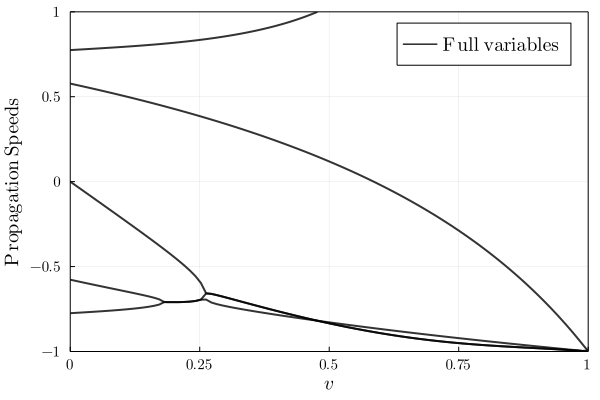

In [328]:
N = 100
μ = -1.0
v_list = zeros(N)

fullEig = fill(0.0+0.0im,(5,N))

for i in 1:N
    v = (i-1)/(N-1)/1.001
    v_list[i] = v
    γ = 1/sqrt(1-v^2)
    v_vec = [γ, γ*v]
    ξ0 = v_vec[1]*sqrt(-μ)
    ξ1 = v_vec[2]*sqrt(-μ)
    ξ = [ξ0, ξ1, 0, 0, 0]

    par_f = [-1.,1.0,-1.]
    re = zeros(5)
    fl = zeros(5)
    con = ξ2c!(re,ξ,zeros(5), par_f);

    fullEig[:,i] = eigvals(PC(re,fl,ξ,con,par_f))
end
one(x)=1
plt = plot(framestyle = :box, xlabel = L"v", ylabel = L"\textrm{Propagation\;Speeds}", labelfontsize = 13, 
            legendfontsize = 13, tickfontsize=10, ticksize = 10)
γ = (1 .- v.^2).^(-1//2)

for k in 1:5
    plot!(plt, v_list,real(fullEig[k,:]), lw = 2, color = :black, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables}" : ""))
    #plot!(plt, v,real(fullEig2[k,:]), lw = 2, color = :red, alpha = 0.8, label = (k == 1 ? L"\textrm{Full\;variables\;2}" : ""))
end
ylims!(-1,1)
xlims!(0,1)
yticks!([-1,0,1, -0.5, 0.5], [L"-1", L"0", L"1", L"-0.5", L"0.5"])
xticks!([0, 0.25, 0.5, 0.75, 1], [L"0", L"0.25", L"0.5", L"0.75", L"1"])
display(plt)